In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
path = 'drive/My Drive/Dataset'

In [ ]:
import os

# Define the path
path = '/content/drive/My Drive/Dataset'

# Check if the path exists
if os.path.exists(path):
    # Change the current directory to the specified path
    os.chdir(path)
    print(f"Changed directory to: {path}")
else:
    print(f"The path {path} does not exist.")

Changed directory to: /content/drive/My Drive/Dataset


In [ ]:
!unrar x data.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from data.rar

Creating    data                                                      OK
Extracting  data/fig1.jpg                                                  1%  OK 
Extracting  data/fig2.jpg                                                  7%  OK 
Extracting  data/fig3.jpg                                                 29%  OK 
Extracting  data/fig4.jpg                                                 53%  OK 
Extracting  data/fig5.jpg                                                 74%  OK 
Extracting  data/fig5_blur.jpg                                            89%  OK 
Extracting  data/finger-bones.jpg                                         98%  OK 
Extracting  data/rect1.jpg                                                99%  OK 
All OK


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


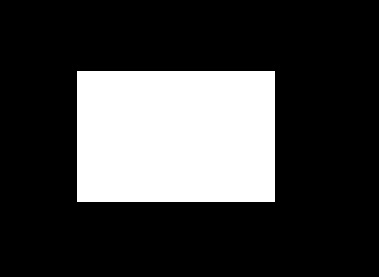

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow  # Use cv2_imshow instead of cv2.imshow
import cv2

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the image file
#pathofImg = '/content/drive/My Drive/Dataset/data/rect1.jpg'

# Read the image
img = cv2.imread(pathofImg)

# Check if the image was loaded successfully
if img is not None:
    cv2_imshow(img)  # Display the image
else:
    print(f"Error: Could not read the image at {pathofImg}")



Question 1

Parameters: Perimeter = 654.00, Area = 25610.00
Centroid: X = 175, Y = 136
Shape: Rectangle


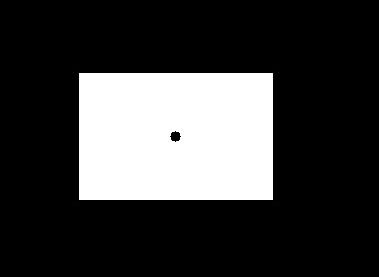

In [ ]:
import cv2

def classify_shape(contour):
    # Calculate the bounding rectangle around the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate the aspect ratio of the bounding rectangle
    aspect_ratio = float(w) / h

    # Define the threshold for classifying as square or rectangle
    threshold = 0.1  # Adjust this value as needed

    # Classify the shape based on the aspect ratio
    if abs(aspect_ratio - 1) <= threshold:
        return "Square"
    else:
        return "Rectangle"

# Load the image
image = cv2.imread('/content/drive/My Drive/Dataset/data/rect1.jpg', 0)  # Replace 'your_image_file.jpg' with your actual image file

# Apply thresholding to convert the image to binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Classify the shape based on the aspect ratio
    shape = classify_shape(approx)

    # Calculate perimeter and area of the contour
    perimeter = cv2.arcLength(approx, True)
    area = cv2.contourArea(approx)

    # Calculate centroid of the contour
    M = cv2.moments(approx)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])

    # Display the parameters, centroid, and shape classification
    print("Parameters: Perimeter = {:.2f}, Area = {:.2f}".format(perimeter, area))
    print("Centroid: X = {}, Y = {}".format(centroid_x, centroid_y))
    print("Shape: {}".format(shape))

    # Draw the contour, centroid, and shape classification on the image
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)
    cv2.putText(image, shape, (centroid_x - 50, centroid_y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Question 3

In [ ]:
import cv2
import numpy as np

def sobel_edge_detection(image):


  sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
  sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
  sobel_mag = np.sqrt(sobelx**2 + sobely**2)
  return sobel_mag

def compare_images(image1, image2):


  sobel_mag1 = sobel_edge_detection(image1)
  sobel_mag2 = sobel_edge_detection(image2)

  # Compute the average edge strength for each image.
  avg_edge_strength1 = np.mean(sobel_mag1)
  avg_edge_strength2 = np.mean(sobel_mag2)

  # Print the edge strength and the results.
  print("Edge strength of Image 1:", avg_edge_strength1)
  print("Edge strength of Image 2:", avg_edge_strength2)

  # The image with the higher average edge strength is clearer.
  if avg_edge_strength1 > avg_edge_strength2:
    print("Image 1 is clearer than Image 2.")
  elif avg_edge_strength1 < avg_edge_strength2:
    print("Image 2 is clearer than Image 1.")
  else:
    print("Both images are equally clear (or blurry).")

# Load the images.
image1 = cv2.imread("/content/drive/My Drive/Dataset/data/fig5.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/drive/My Drive/Dataset/data/fig5_blur.jpg", cv2.IMREAD_GRAYSCALE)

# Compare the images and print the result.
compare_images(image1, image2)


Edge strength of Image 1: 266.94750082627405
Edge strength of Image 2: 255.25046440925993
Image 1 is clearer than Image 2.


Question 2

The number of black pixels in the image is greater, and it is a girl.
Number of Black Pixels: 98139


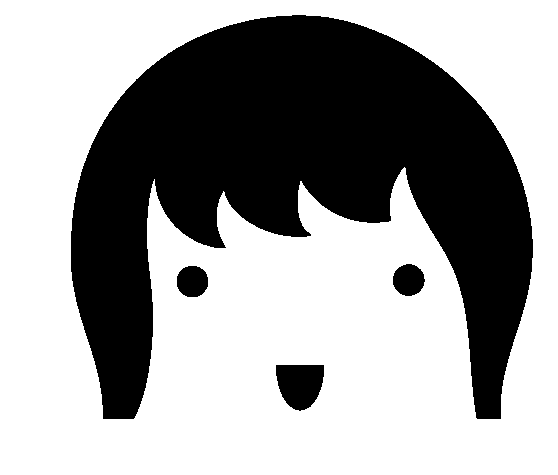

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def count_black_pixels(image):
    """Counts the number of black pixels in an image.

    Args:
        image: A grayscale image.

    Returns:
        The number of black pixels in the image.
    """
    black_pixels = np.sum(image == 0)
    return black_pixels

def compare_black_pixel_counts(image1, image2):
    """Compares the number of black pixels in two images and outputs the image with more black pixels.

    Args:
        image1: A grayscale image.
        image2: A grayscale image.

    Returns:
        The image with more black pixels and the number of black pixels.
    """
    black_pixel_count1 = count_black_pixels(image1)
    black_pixel_count2 = count_black_pixels(image2)

    if black_pixel_count1 > black_pixel_count2:
        return image1, black_pixel_count1
    elif black_pixel_count2 > black_pixel_count1:
        return image2, black_pixel_count2
    else:
        return None, black_pixel_count1  # Both images have the same number of black pixels

# Read the two images
image1 = cv2.imread("/content/drive/My Drive/Dataset/data/fig3.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/drive/My Drive/Dataset/data/fig4.jpg", cv2.IMREAD_GRAYSCALE)

# Apply a threshold to the images to binarize them
threshold = 128
_, image1_thresh = cv2.threshold(image1, threshold, 255, cv2.THRESH_BINARY)
_, image2_thresh = cv2.threshold(image2, threshold, 255, cv2.THRESH_BINARY)

# Compare the number of black pixels in the two images and output the image with more black pixels
image_with_more_black_pixels, black_pixel_count = compare_black_pixel_counts(image1_thresh, image2_thresh)

# Output the result
if image_with_more_black_pixels is not None:
    print(f"The number of black pixels in the image is greater, and it is a girl.")
    print(f"Number of Black Pixels: {black_pixel_count}")
    cv2_imshow(image_with_more_black_pixels)
    cv2.waitKey(0)
else:
    print("The two images have the same number of black pixels.")


Number of Contours: 3
Number of Detected Regions: 3


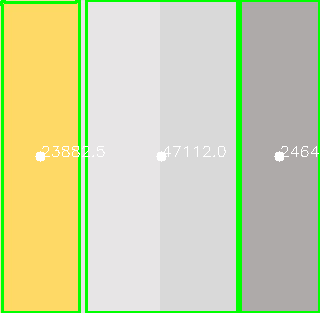

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/drive/My Drive/Dataset/data/fig1.jpg")

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extract the saturation channel
saturation = hsv_image[:, :, 1]

# Apply adaptive thresholding to segment the image into regions
threshold = cv2.adaptiveThreshold(saturation, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store detected regions
detected_regions = []

# Iterate through each contour
for contour in contours:
    # Calculate area
    area = cv2.contourArea(contour)

    # Filter out small contours
    if area < 100:
        continue

    # Add the detected region to the list
    detected_regions.append((area, contour))

# Print the number of contours and detected regions
print("Number of Contours:", len(contours))
print("Number of Detected Regions:", len(detected_regions))

# Draw all detected contours on the image (for debugging)
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)


# Annotate the image with the areas and centroids of the detected regions
for idx, (area, contour) in enumerate(detected_regions):
    M = cv2.moments(contour)
    if M["m00"] != 0:
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])

        cv2.putText(image, f'{area}', (centroid_x, centroid_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        cv2.circle(image, (centroid_x, centroid_y), 5, (255, 255, 255), -1)

# Save or display the annotated image
cv2.imwrite('annotated_image.jpg', image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Question 4

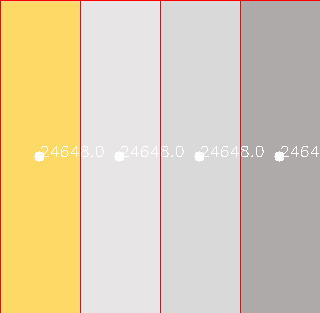

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def calculate_areas_of_bars(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Define the regions of interest (ROIs) for each color bar
    roi_coords = [
        (0, 0, image.shape[1] // 4, image.shape[0]),  # First bar
        (image.shape[1] // 4, 0, image.shape[1] // 4, image.shape[0]),  # Second bar
        (image.shape[1] // 2, 0, image.shape[1] // 4, image.shape[0]),  # Third bar
        (3 * image.shape[1] // 4, 0, image.shape[1] // 4, image.shape[0])  # Fourth bar
    ]

    # Initialize a list to store the areas
    areas = []

    # Loop through each ROI to calculate area
    for i, (x, y, w, h) in enumerate(roi_coords):
        # Extract the ROI for each color bar
        roi = image[y:y+h, x:x+w]

        # Convert the ROI to grayscale
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # Threshold the ROI to create a binary mask
        _, thresholded = cv2.threshold(gray_roi, 1, 255, cv2.THRESH_BINARY)

        # Find contours in the binary mask
        contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the area and centroid of the contour in the ROI
        for contour in contours:
            area = cv2.contourArea(contour)

            # Exclude small noise regions (adjust as needed)
            if area > 100:
                areas.append(area)

                # Draw a bounding rectangle around the bar in the original image
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 1)

                # Calculate the centroid of the contour
                M = cv2.moments(contour)
                centroid_x = int(M['m10'] / M['m00']) + x  # Adjust centroid x-coordinate by adding x
                centroid_y = int(M['m01'] / M['m00']) + y  # Adjust centroid y-coordinate by adding y

                # Annotate the area at the centroid of the contour
                cv2.putText(image, f'{area}', (centroid_x, centroid_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
                cv2.circle(image, (centroid_x, centroid_y), 5, (255, 255, 255), -1)

    # Show the image with annotations
    cv2_imshow(image)

# Usage
image_path = '/content/drive/My Drive/Dataset/data/fig1.jpg'
calculate_areas_of_bars(image_path)


Question 5

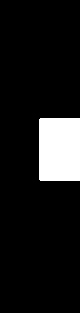

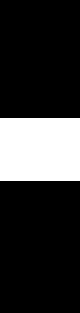

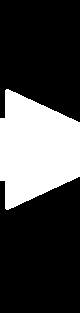

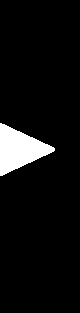

Bar 1 - Area: 24648.0, Percentage Covered by Red Arrow: 10.47%
Bar 2 - Area: 24648.0, Percentage Covered by Red Arrow: 20.45%
Bar 3 - Area: 24648.0, Percentage Covered by Red Arrow: 28.35%
Bar 4 - Area: 24648.0, Percentage Covered by Red Arrow: 6.41%


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def calculate_areas_and_percentages(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Define the color range for the red arrow (adjust as needed)
    lower_red = np.array([0, 0, 150])  # Lower BGR threshold for red
    upper_red = np.array([100, 100, 255])  # Upper BGR threshold for red

    # Define the regions of interest (ROIs) for each color bar
    roi_coords = [
        (0, 0, image.shape[1] // 4, image.shape[0]),  # First bar
        (image.shape[1] // 4, 0, image.shape[1] // 4, image.shape[0]),  # Second bar
        (image.shape[1] // 2, 0, image.shape[1] // 4, image.shape[0]),  # Third bar
        (3 * image.shape[1] // 4, 0, image.shape[1] // 4, image.shape[0])  # Fourth bar
    ]

    # Initialize lists to store the areas and percentages
    areas = []
    percentages = []

    # Loop through each ROI to calculate area and percentage
    for i, (x, y, w, h) in enumerate(roi_coords):
        # Extract the ROI for each color bar
        roi = image[y:y+h, x:x+w]

        # Convert the ROI to grayscale
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # Threshold the ROI to create a binary mask
        _, thresholded = cv2.threshold(gray_roi, 1, 255, cv2.THRESH_BINARY)

        # Find contours in the binary mask
        contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the area of the contour in the ROI
        for contour in contours:
            area = cv2.contourArea(contour)

            # Exclude small noise regions (adjust as needed)
            if area > 100:
                areas.append(area)

                # Create a mask for the red arrow within the ROI
                mask = cv2.inRange(roi, lower_red, upper_red)

                # Calculate the area covered by the red arrow
                arrow_area = np.sum(mask == 255)

                # Calculate the percentage area covered by the arrow
                percentage = (arrow_area / area) * 100
                percentages.append(percentage)

                # Display the segmented red arrow (debugging purposes)
                cv2_imshow(mask)

    return areas, percentages

# Usage
image_path = '/content/drive/My Drive/Dataset/data/fig2.jpg'
areas, percentages = calculate_areas_and_percentages(image_path)

for i, (area, percentage) in enumerate(zip(areas, percentages)):
    print(f"Bar {i + 1} - Area: {area}, Percentage Covered by Red Arrow: {percentage:.2f}%")


Question 6

Number of Blue areas identified: 2


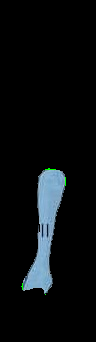

Blue Bone 1:
Maximum width: 45
Maximum height: 127


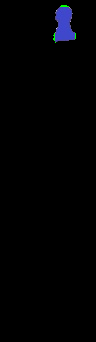

Blue Bone 2:
Maximum width: 23
Maximum height: 38
Number of Peach areas identified: 2


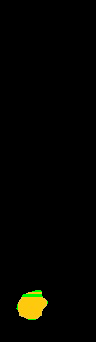

Peach Bone 1:
Maximum width: 32
Maximum height: 30


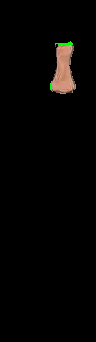

Peach Bone 2:
Maximum width: 26
Maximum height: 53
Number of Green areas identified: 1


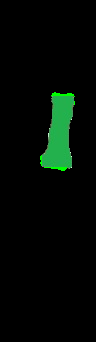

Green Bone 1:
Maximum width: 35
Maximum height: 79


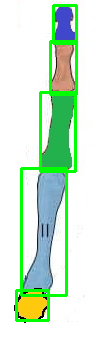

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/drive/My Drive/Dataset/data/finger-bones.jpg")

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV ranges for each color
color_ranges = [
    ((90, 50, 50), (130, 255, 255), "Blue"),
    ((5, 50, 50), (25, 255, 255), "Peach"),
    ((35, 50, 50), (85, 255, 255), "Green")
]

# Create a directory to save segmented images
import os
os.makedirs('segmented_images', exist_ok=True)

# Iterate over each color range and segment the image
for lower_bound, upper_bound, color_name in color_ranges:
    # Create a mask for the current color range
    mask = cv2.inRange(hsv_image, np.array(lower_bound), np.array(upper_bound))

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours based on a minimum area threshold
    min_area_threshold = 100  # Adjust this threshold as needed
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_area_threshold]

    # Print the number of areas identified for the current color
    print(f'Number of {color_name} areas identified: {len(filtered_contours)}')

    # Iterate over each segment and save it as a separate image
    for i, contour in enumerate(filtered_contours):
        # Create a mask for the current segment
        segment_mask = np.zeros_like(mask)
        cv2.drawContours(segment_mask, [contour], 0, 255, -1)

        # Find the bounding box of the current segment
        x, y, w, h = cv2.boundingRect(contour)

        # Draw a green bounding box around the segment
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Apply the mask to the original image to extract the segment
        segmented_image = cv2.bitwise_and(image, image, mask=segment_mask)

        # Save the segmented image with a unique name
        segment_filename = f'segmented_images/{color_name}_segment_{i}.jpg'
        cv2.imwrite(segment_filename, segmented_image)

        # Display the segmented image using cv2_imshow
        cv2_imshow(segmented_image)

        # Determine the width and height of the current bone
        bone_width = w
        bone_height = h

        # Display the maximum width and maximum height of the current bone
        print(f'{color_name} Bone {i + 1}:')
        print(f'Maximum width: {bone_width}')
        print(f'Maximum height: {bone_height}')

# Display the original image with bounding boxes
cv2_imshow(image)
